# Architektura encoder-decoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

In [2]:
from tensorflow.keras.models import Model

In [3]:

import plotly.graph_objects as go

In [4]:

from tensorflow.keras.optimizers import Adadelta, Adam, Nadam, RMSprop, SGD, Ftrl

Wiele systemów opartych na uczeniu maszynowym korzysta z algorytmów, które przypisują skomplikowanym wzorcom danych, takim jak zdjęcia, skróconą reprezentację w postaci wektorowej. Ten zabieg jest szczególnie użyteczny w następujących zadaniach:
• redukcja wymiarowości danych,
• modelowanie statystycznych własności zbioru danych,
• generowanie nowych danych podobnych do danych wzorcowych.
Autoenkodery są przykładem klasy algorytmów, które mogą wykonywać tego rodzaju zadania.

Autoenkoder składa się z dwóch sieci neuronowych: kodera i dekodera. Matematycznie rzecz biorąc, te sieci realizują przekształcenie tożsamościowe:
𝑔(f(𝒙)) ≈ 𝒙.
Zazwyczaj dekoder minimalizuje błąd rekonstrukcji wzorca, ale w bardziej zaawansowanych przykładach zastosowań ten cel może być modyfikowany lub zupełnie inny, w zależności od realizowanego celu autoenkodera. Tutaj 𝑓 (𝒙) oznacza funkcję realizowaną przez kodera, a 𝑔 (𝒙) oznacza funkcję realizowaną przez dekodera.

![picture](https://miro.medium.com/v2/resize:fit:600/1*nqzWupxC60iAH2dYrFT78Q.png)

Autoenkoder, który składa się z wielu warstw, jest nazywany autoenkoderem głębokim. Podobnie jak w przypadku autoenkodera nadkompletnego, autoenkoder głęboki ma zdolność do nauki bardziej skomplikowanych przekształceń.

Autoenkoder nadkompletny może nauczyć się "kopiowania" danych z wejścia do wektora reprezentacji, dlatego zazwyczaj stosuje się techniki regularyzacyjne, aby temu zapobiec (np. przez rzadkie wektory reprezentacji).

W przypadku autoenkoderów głębokich może pojawić się problem polegający na zapamiętywaniu wzorców przez dekoder. Dekoder może zachowywać się jak pamięć, gdzie wzorce treningowe są zapisane w jego wagach. W takiej sytuacji:

Koder przypisuje danemu wzorcowi treningowemu krótki wektor reprezentacji, a w skrajnym przypadku może to być pojedyncza liczba.
Dekoder na podstawie takiej reprezentacji "odczytuje" wzorzec zapisany w swoich wagach.
Taki model nie posiada właściwości generalizacyjnych. Oczywiście jest to skrajny i mało prawdopodobny przykład w praktyce, ale dobrze ilustruje możliwe zagrożenia wynikające z zastosowania zbyt złożonych modeli autoenkoderów.


Co do zasady warto korzystać z autoenkoderów wielowarstwowych, jednak ich trening staje się problematyczny. Jest on trudny i zwykle nieefektywny ze względu na efekt zanikającego gradientu.

Zagrożenie wypłaszczenia funkcji błędu przez algorytm treningowy.
Autoenkodery trenowane etapami są często nazywane autoenkoderami stosowymi (stacked autoencoders), a ta nazwa jest czasami używana zamiennie z terminem "autoenkoder głęboki".

## Przykład 1

In [80]:
def skupiska(npoints,stand_devs,random_state=1):
    np.random.seed(random_state)
    skupisko_1 = stand_devs[0] * rng.randn(npoints, 2)+15
    skupisko_2 = stand_devs[1] * rng.randn(npoints, 2)-10
    skupisko_3 = stand_devs[2] * rng.randn(npoints, 2)+[30,-30]  
    trzy_skupiska = np.r_[skupisko_1,skupisko_2,skupisko_3]
    trzy_skupiska[:,0] = (trzy_skupiska[:,0]-min(trzy_skupiska[:,0]))/(max(trzy_skupiska[:,0]-min(trzy_skupiska[:,0])))
    trzy_skupiska[:,1] = (trzy_skupiska[:,1]-min(trzy_skupiska[:,1]))/(max(trzy_skupiska[:,1]-min(trzy_skupiska[:,1])))
    return trzy_skupiska
def sample_spherical(npoints, ndim=3,random_state=1,normalize=True,noise = True):
    np.random.seed(random_state)
    vec = np.random.randn(npoints,ndim)
    vec /= np.reshape(np.linalg.norm(vec, axis=1),[npoints,1])
    if noise :
      vec = vec + 0.1*rng.randn(npoints,ndim)
    if normalize :
      vec[:,0] = (vec[:,0]-min(vec[:,0]))/(max(vec[:,0]-min(vec[:,0])))
      vec[:,1] = (vec[:,1]-min(vec[:,1]))/(max(vec[:,1]-min(vec[:,1])))
    return vec

In [104]:


class Autoencoder(Model):
  def __init__(self, n_features, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.InputLayer(input_shape = (n_features,)),
      layers.Dense(latent_dim, activation='elu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(n_features, activation='sigmoid'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [105]:
rng = np.random.RandomState(1)
sfera = sample_spherical(1000,2)
sfera_y = sfera[:,0] - sfera[:,1]
sfera_y = (sfera_y - min(sfera_y))/(max(sfera_y) - min(sfera_y))

In [106]:
fig = go.Figure(data=[go.Scatter3d(x=sfera[:, 0], y=sfera[:, 1], z=sfera_y,
                                   mode='markers',marker = dict(
                                   color = sfera_y))])
fig.show()

In [107]:
train_data = np.c_[sfera,sfera_y]

In [108]:
latent_dim = 2 
autoencoder = Autoencoder(train_data.shape[1],latent_dim)

In [109]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [110]:
autoencoder.fit(train_data, train_data,
                epochs=100,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.0911 - val_loss: 0.0920
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0839 - val_loss: 0.0849
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0776 - val_loss: 0.0789
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0723 - val_loss: 0.0736
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0677 - val_loss: 0.0690
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0636 - val_loss: 0.0650
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0601 - val_loss: 0.0615
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0569 - val_loss: 0.0583
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0541 - val_loss: 0.0554
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0514 - val_loss: 0.0528
Epoch 11

In [111]:
predictions = autoencoder(train_data)

In [112]:
predictions

<tf.Tensor: shape=(1000, 3), dtype=float32, numpy=
array([[0.8784174 , 0.3342925 , 0.87117296],
       [0.31297275, 0.13406524, 0.68391407],
       [0.6525719 , 0.13903172, 0.85349745],
       ...,
       [0.13830398, 0.6785641 , 0.13322909],
       [0.71908826, 0.1796081 , 0.85382795],
       [0.7083014 , 0.86111546, 0.3328622 ]], dtype=float32)>

In [113]:
autoencoder.encoder(train_data)

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[-0.47906888,  1.064859  ],
       [-0.29096687, -0.23135799],
       [-0.5849778 ,  0.2955916 ],
       ...,
       [ 0.8567335 ,  0.02833158],
       [-0.54526967,  0.48306143],
       [ 0.64396226,  1.2830237 ]], dtype=float32)>

In [114]:
autoencoder.decoder(autoencoder.encoder(train_data))

<tf.Tensor: shape=(1000, 3), dtype=float32, numpy=
array([[0.8784174 , 0.3342925 , 0.87117296],
       [0.31297275, 0.13406524, 0.68391407],
       [0.6525719 , 0.13903172, 0.85349745],
       ...,
       [0.13830398, 0.6785641 , 0.13322909],
       [0.71908826, 0.1796081 , 0.85382795],
       [0.7083014 , 0.86111546, 0.3328622 ]], dtype=float32)>

In [115]:
fig = go.Figure(data=[go.Scatter3d(x=predictions[:, 0], y=predictions[:, 1], z=predictions[:, 2],
                                   mode='markers',marker = dict(
                                   color = predictions[:, 2]))])
fig.show()

In [148]:
class Autoencoder(Model):
  def __init__(self, n_features, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.InputLayer(input_shape = (n_features,)),
      layers.Dense(32, activation='elu'),
      layers.Dense(latent_dim, activation='elu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation='sigmoid'),
      layers.Dense(n_features, activation='elu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [149]:
latent_dim = 2
autoencoder = Autoencoder(train_data.shape[1],latent_dim)

In [150]:
autoencoder.compile(optimizer=Adam(learning_rate = 0.0001), loss=losses.MeanSquaredError())

In [151]:
history = autoencoder.fit(train_data, train_data,
                epochs=100,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.3510 - val_loss: 0.3204
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3106 - val_loss: 0.2828
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2739 - val_loss: 0.2487
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2406 - val_loss: 0.2184
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2109 - val_loss: 0.1919
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1856 - val_loss: 0.1694
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1643 - val_loss: 0.1512
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1471 - val_loss: 0.1362
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1330 - val_loss: 0.1242
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1216 - val_loss: 0.1145
Epoch 11

In [152]:
predictions = autoencoder.predict(train_data)

32/32 [==============================] - 0s 1ms/step


In [153]:
fig = go.Figure(data=[go.Scatter3d(x=predictions[:, 0], y=predictions[:, 1], z=predictions[:, 2],
                                   mode='markers',marker = dict(
                                   color = predictions[:, 2]))])
fig.show()

In [154]:
reduced = autoencoder.encoder(train_data)

In [156]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        y = reduced[:,0],
        x = reduced[:,1],
        mode='markers',
    )
)
fig.show()

### Zadanie 1 - sprawdź, w jaki sposób funkcje aktywacji potrafią wpływnąć na wartość funkcji kosztu autoencodera

## Przykład 2

In [20]:
rng = np.random.RandomState(1)
trzy_skupiska = skupiska(1000, [3, 5, 7])
trzy_skupiska_y = np.r_[np.sum(5*(trzy_skupiska[:1000,:] - [0.5,0.87])**2,axis = 1),
                        np.sum(-1*(trzy_skupiska[1000:2000,:] - [0.2,0.55])**2,axis = 1),
                        np.sum((trzy_skupiska[2000:3000,:] - [0.7,0.25])**2,axis = 1)]
trzy_skupiska_y = (trzy_skupiska_y - min(trzy_skupiska_y))/(max(trzy_skupiska_y) - min(trzy_skupiska_y))

In [21]:
fig = go.Figure(data=[go.Scatter3d(x=trzy_skupiska[:, 0], y=trzy_skupiska[:, 1], z=trzy_skupiska_y,
                                   mode='markers',marker = dict(
                                   color = trzy_skupiska_y))])
fig.show()

In [22]:
train_data = np.c_[trzy_skupiska,trzy_skupiska_y]

In [30]:
latent_dim = 2 
autoencoder = Autoencoder(3,latent_dim)

In [31]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [32]:
autoencoder.fit(train_data, train_data,
                epochs=100,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100
75/75 [==============================] - 1s 4ms/step - loss: 0.0569 - val_loss: 0.0562
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.0563
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.0583
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0610
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0365 - val_loss: 0.0636
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.0657
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.0673
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0332 - val_loss: 0.0680
Epoch 9/100
75/75 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.0684
Epoch 10/100
75/75 [==============================] - 0s 4ms/step - loss: 0.0322 - val_loss: 0.0683
Epoch 11/

In [33]:
predicted_dataset = autoencoder.predict(train_data)

94/94 [==============================] - 0s 2ms/step


In [35]:
fig = go.Figure(data=[go.Scatter3d(x=predicted_dataset[:, 0], y=predicted_dataset[:, 1], z=predicted_dataset[:,2],
                                   mode='markers',marker = dict(
                                   color = predicted_dataset[:,2]))])
fig.show()

## Przykład 3

In [5]:
from tensorflow.keras.datasets import mnist, cifar10

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
class CNN_Autoencoder(Model):
  def __init__(self):
    super(CNN_Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(x_train.shape[1], x_train.shape[2], 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CNN_Autoencoder()

In [21]:
autoencoder.compile(optimizer=Adam(
                  learning_rate=0.01
                  ), loss=losses.MeanSquaredError())

In [22]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.01, 
                                            patience=10, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [23]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                shuffle=True,
                callbacks=[early_stop],
                validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 42s 5ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 9.9335e-04 - val_loss: 8.6101e-04
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 8.6090e-04 - val_loss: 8.1592e-04
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 8.1676e-04 - val_loss: 8.5706e-04
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 7.8662e-04 - val_loss: 7.4290e-04
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 7.5300e-04 - val_loss: 6.9577e-04
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 7.2423e-04 - val_loss: 6.7680e-04
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 7.0634e-04 - val_loss: 6.5765e-04
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 6.9464e-04 - val_loss: 6.7964e-04
Epoch 10

In [24]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [30]:
decoded_imgs.shape

(10000, 28, 28, 1)

In [31]:
encoded_imgs.shape

(10000, 7, 7, 8)

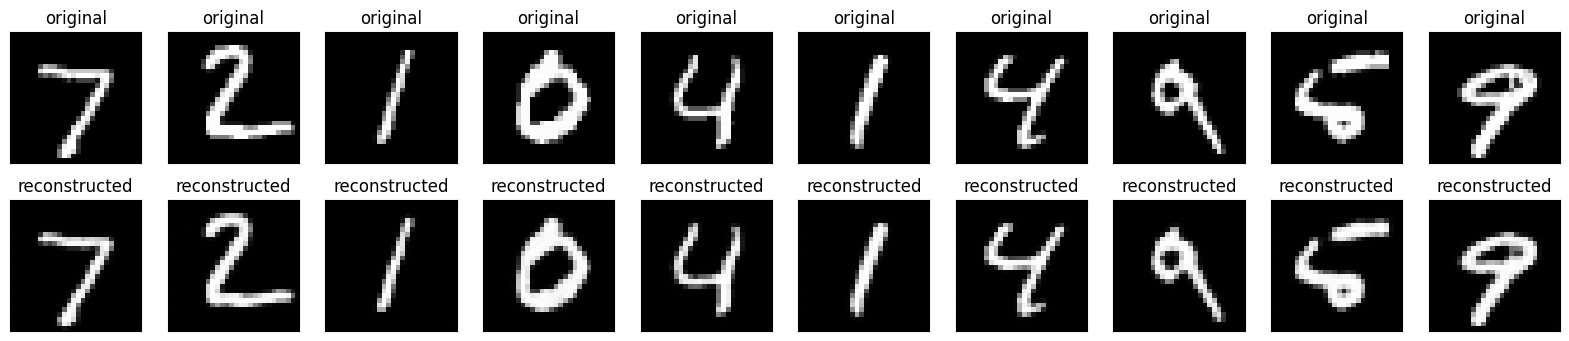

In [25]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

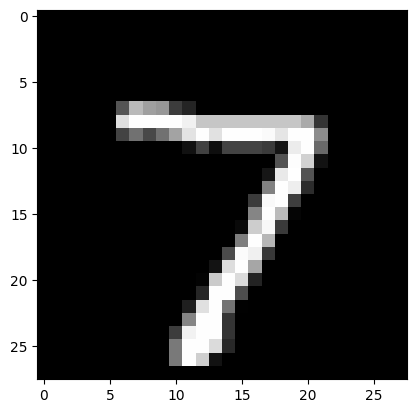

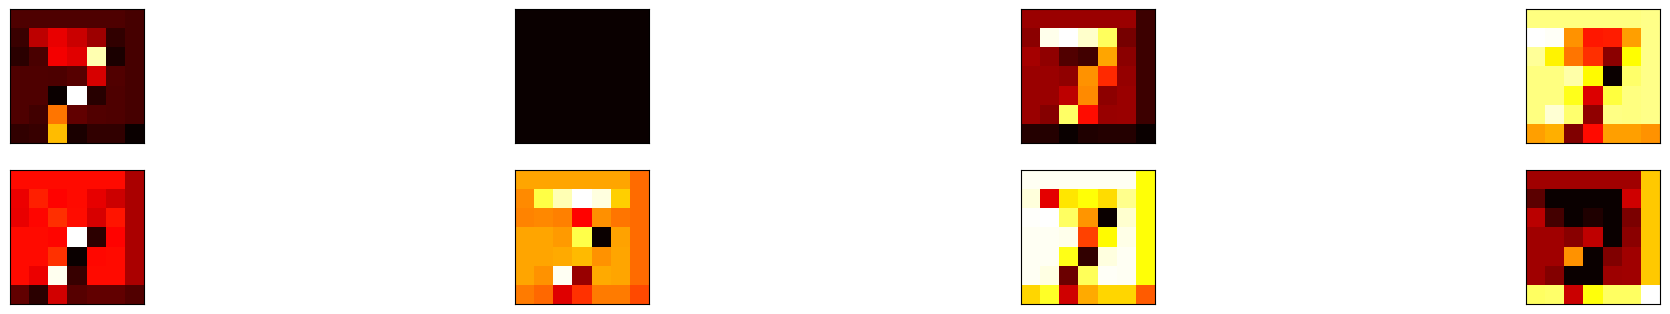

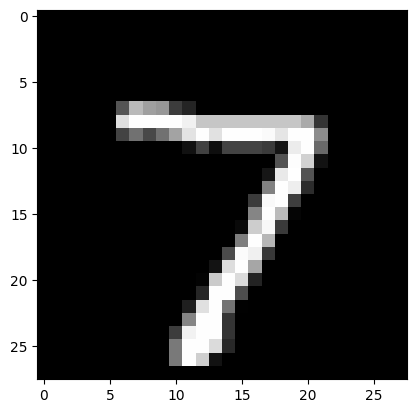

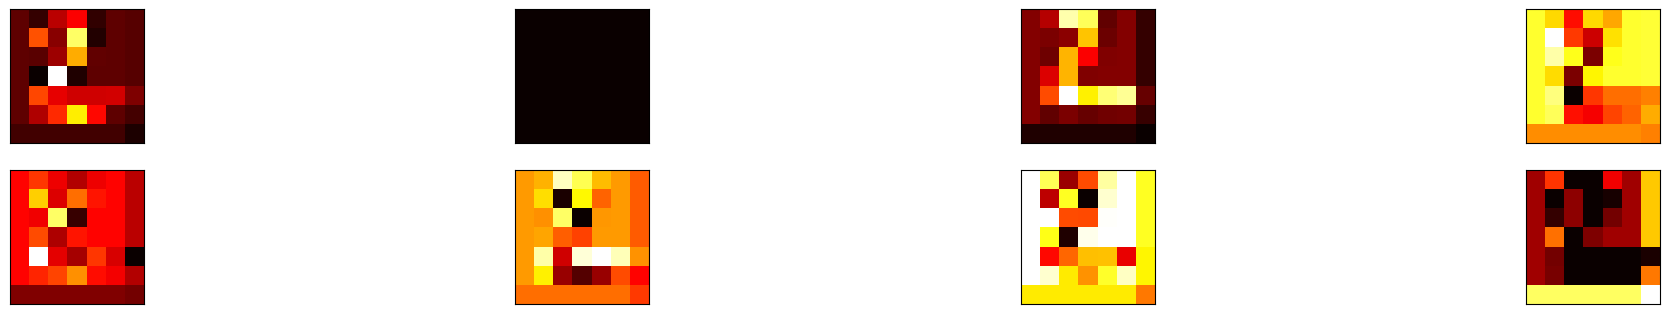

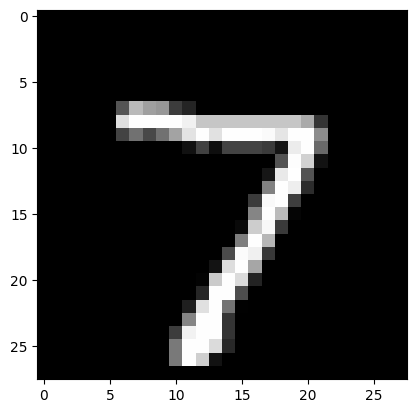

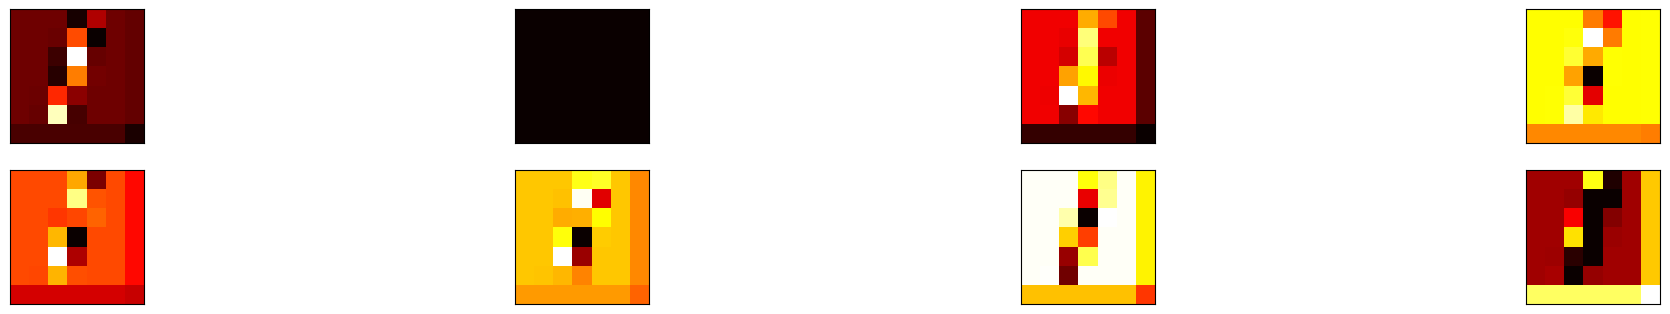

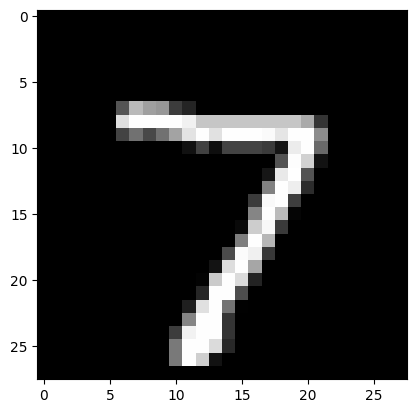

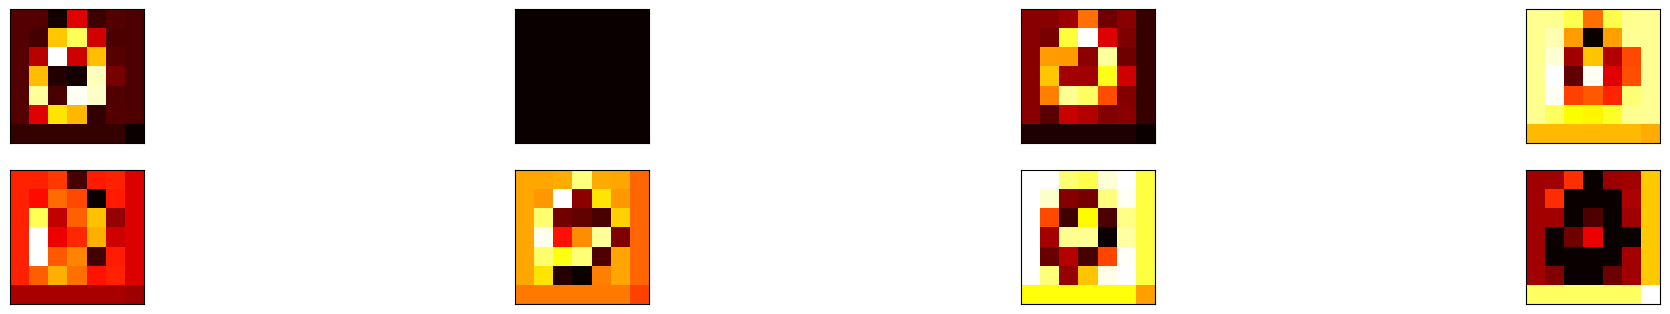

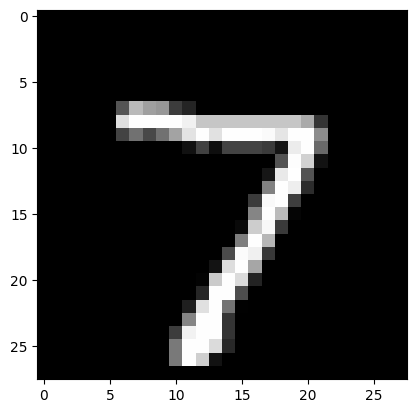

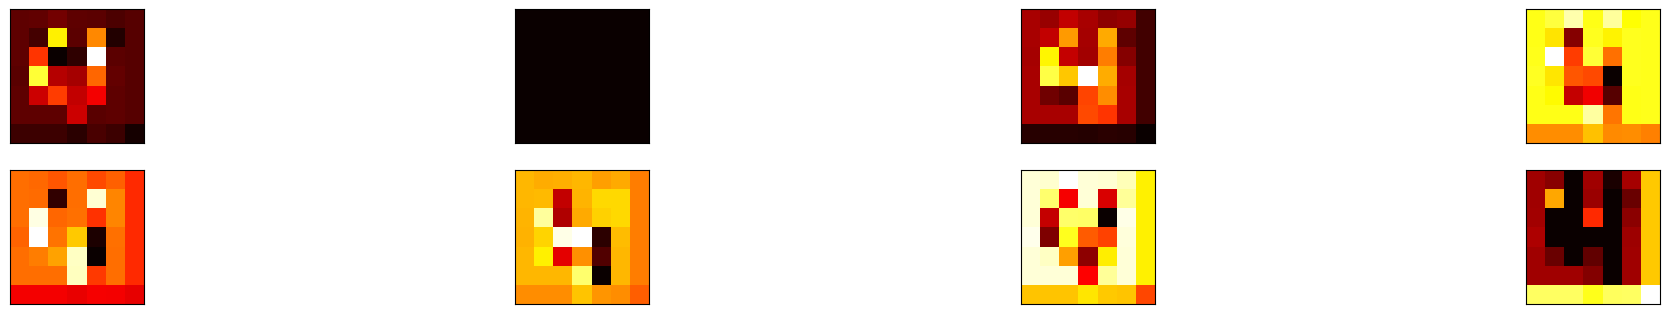

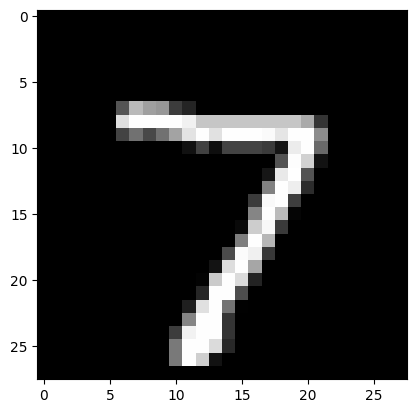

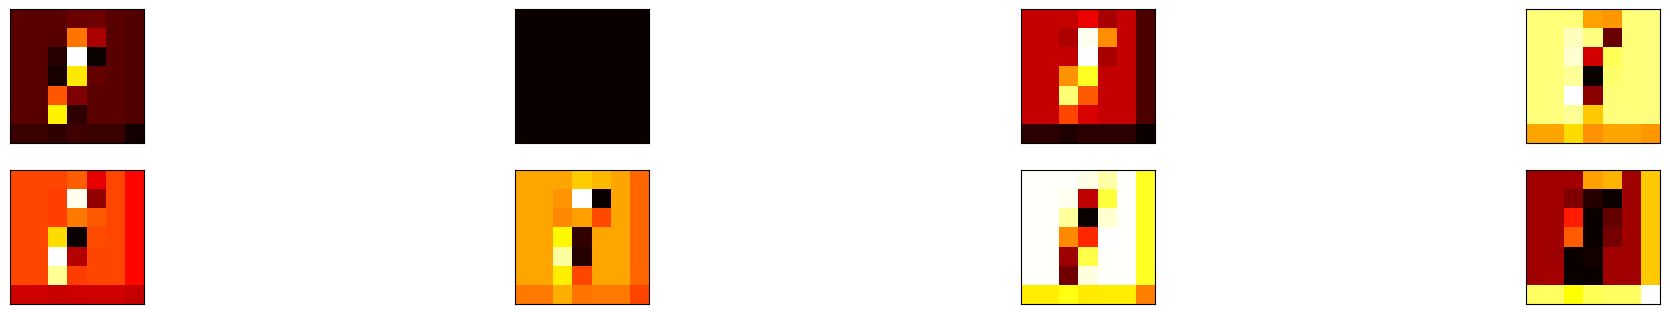

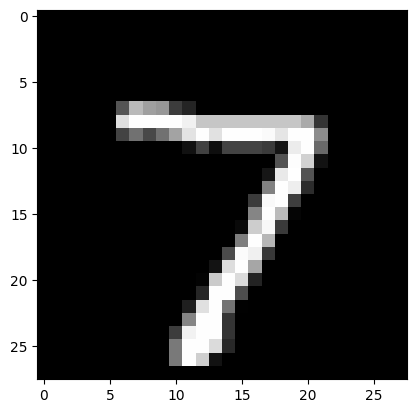

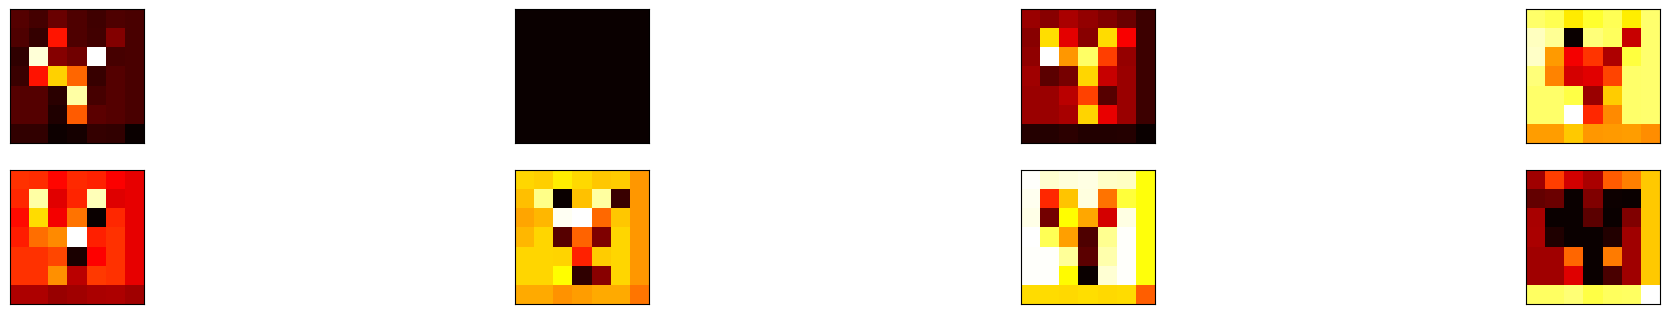

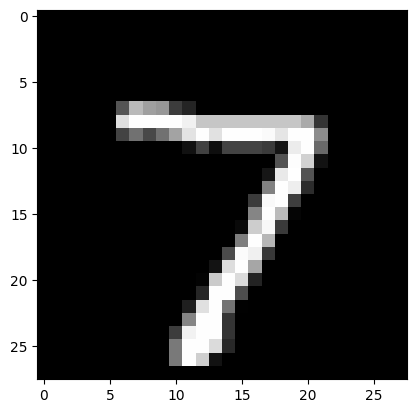

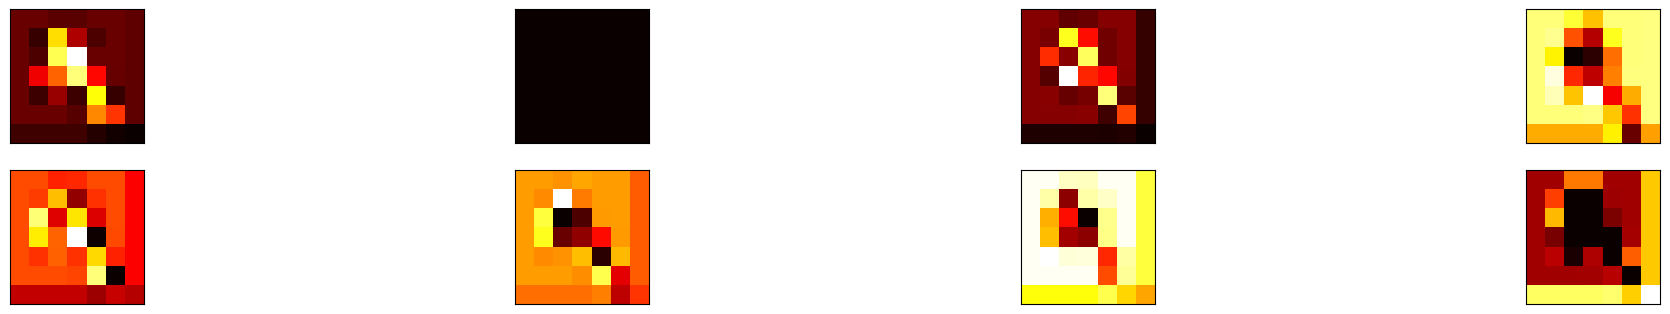

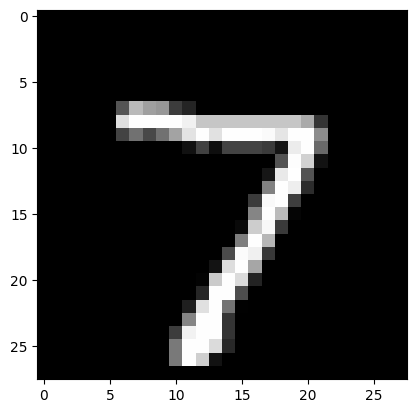

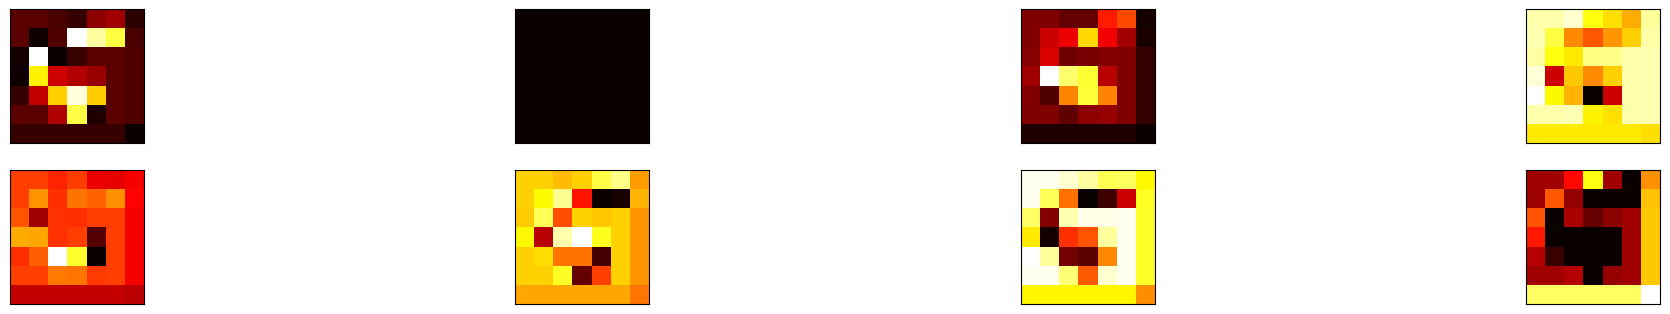

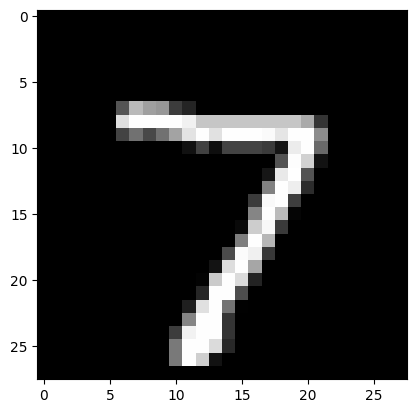

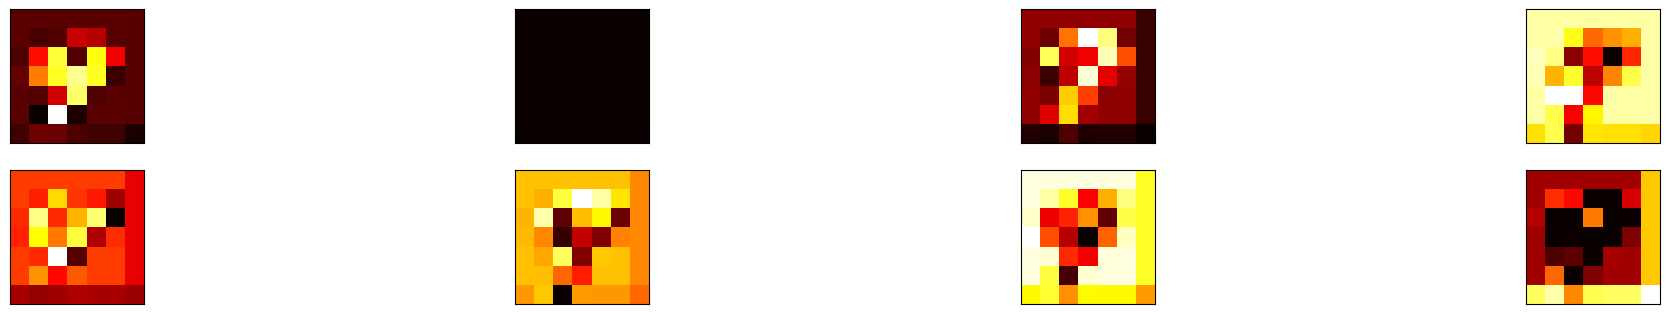

In [36]:
square = 4
ix = 1
for j in range(10):
  image = x_test[i]
  plt.imshow(image)
  plt.show()
  fig = plt.figure(figsize=(25, 8))
  for _ in range(square):
    for _ in range(square-2):
      ax = fig.add_subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(encoded_imgs[j][ :, :, ix-1], cmap='hot')
      ix += 1
  plt.show()
  ix = 1

In [37]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [50]:
class CNN_Autoencoder(Model):
  def __init__(self):
    super(CNN_Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(x_train.shape[1], x_train.shape[2], 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CNN_Autoencoder()

In [51]:
autoencoder.compile(optimizer=Adam(
                  learning_rate=0.01
                  ), loss=losses.MeanSquaredError())

In [52]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.01, 
                                            patience=10, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [53]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                shuffle=True,
                callbacks=[early_stop],
                validation_data=(x_test, x_test))

Epoch 1/100
1563/1563 [==============================] - 12s 6ms/step - loss: 0.0061 - val_loss: 0.0033
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 9/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 10/100
1563/1563 [==============================] - 9s 5ms/step - 

In [54]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [55]:
decoded_imgs.shape

(10000, 32, 32, 3)

In [56]:
encoded_imgs.shape

(10000, 8, 8, 8)

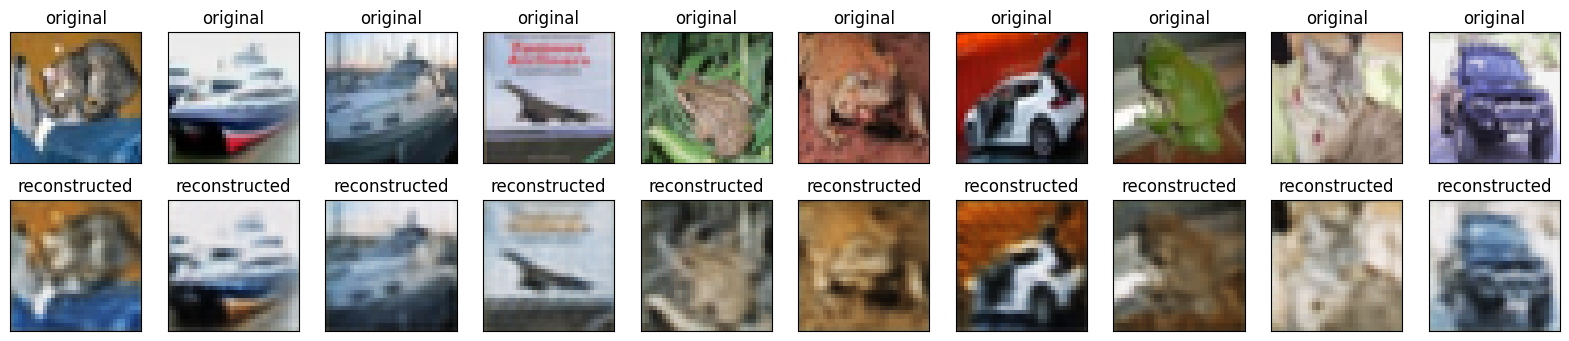

In [57]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Redukcja wymiarowości

In [100]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras import backend as K, metrics, layers, losses, optimizers

from tensorflow.keras.activations import elu, exponential, hard_sigmoid, linear, relu, sigmoid, softmax, tanh
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy, logcosh, mean_squared_error, poisson, mean_absolute_error
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adadelta, Adam, Nadam, RMSprop, SGD, Ftrl

In [171]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [157]:
from sklearn.datasets import make_classification, make_regression

In [239]:
X, y = make_regression(
    n_samples=100, n_features=10, n_informative=2, n_targets=1, bias=0.0, effective_rank=1, noise=0.1, shuffle=True,
)

In [240]:
X[0]

array([ 0.02780929,  0.02817426, -0.0496998 , -0.02353527,  0.08229991,
       -0.09983935, -0.0108659 ,  0.00928212, -0.02133505, -0.06509109])

In [241]:
y[0]

-2.851245917186924

In [242]:
model = Sequential()
model.add(Dense(128,
          input_dim=X.shape[1],
          activation=relu))
model.add(Dense(64,
                activation=elu))
model.add(Dense(32,
                activation=elu))


model.add(Dense(1, activation=linear,
                kernel_initializer='normal'))

model.compile(loss=mean_squared_error,
              optimizer=Adam(
                  learning_rate=0.01
                  ),
              metrics=['mse'])

In [243]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_mse', 
                                            min_delta=0.01, 
                                            patience=50, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [244]:
history = model.fit(X,
                    y,
                    epochs=500,
                    batch_size=100,
                    callbacks=[early_stop],
                    validation_split=0.2,
                    verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 32.9995 - mse: 32.9995 - val_loss: 34.3669 - val_mse: 34.3669
Epoch 2/500
1/1 [==============================] - 0s 39ms/step - loss: 32.7429 - mse: 32.7429 - val_loss: 34.1931 - val_mse: 34.1931
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 32.3283 - mse: 32.3283 - val_loss: 33.8891 - val_mse: 33.8891
Epoch 4/500
1/1 [==============================] - 0s 37ms/step - loss: 31.6108 - mse: 31.6108 - val_loss: 33.4386 - val_mse: 33.4386
Epoch 5/500
1/1 [==============================] - 0s 60ms/step - loss: 30.5289 - mse: 30.5289 - val_loss: 32.9209 - val_mse: 32.9209
Epoch 6/500
1/1 [==============================] - 0s 41ms/step - loss: 29.0992 - mse: 29.0992 - val_loss: 32.5373 - val_mse: 32.5373
Epoch 7/500
1/1 [==============================] - 0s 42ms/step - loss: 27.5017 - mse: 27.5017 - val_loss: 32.0403 - val_mse: 32.0403
Epoch 8/500
1/1 [==============================] - 0s 57ms/step 

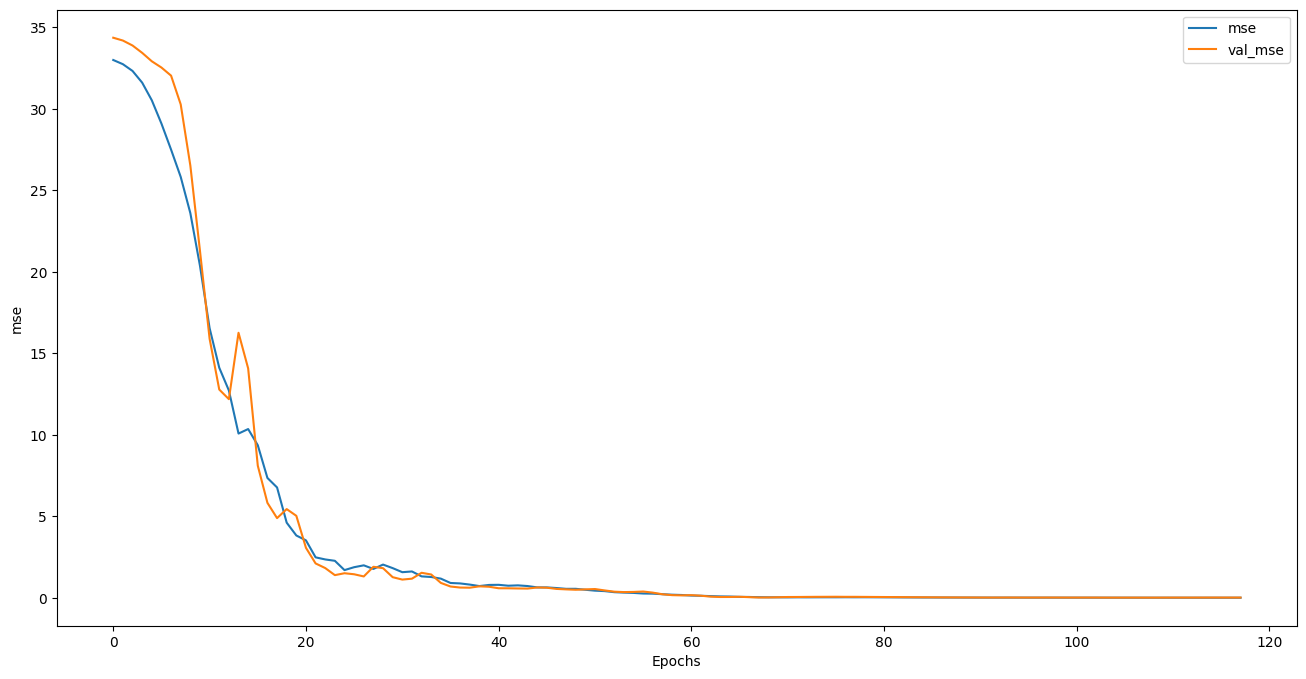

In [245]:
plt.figure(figsize=(16, 8))
plot_graphs(history, 'mse')
plt.show()

In [246]:
model.evaluate(X,y)

4/4 [==============================] - 0s 5ms/step - loss: 0.0347 - mse: 0.0347


[0.03468150272965431, 0.03468150272965431]

In [256]:
latent_dim = 8
autoencoder = Autoencoder(X.shape[1],latent_dim)

In [257]:
autoencoder.compile(optimizer=Adam(
                  learning_rate=0.01
                  ), loss=losses.MeanSquaredError())

In [258]:
autoencoder.fit(X, X,
                epochs=100,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 109ms/step - loss: 0.2717 - val_loss: 0.1015
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0714 - val_loss: 0.0179
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0183 - val_loss: 0.0353
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0400 - val_loss: 0.0419
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0385 - val_loss: 0.0284
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0271 - val_loss: 0.0208
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0195 - val_loss: 0.0123
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0108 - val_loss: 0.0067
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0056 - val_loss: 0.0063
Epoch 11/100
3/3 [

In [259]:
encoded_X = autoencoder.encoder(X)

In [260]:
encoded_X[0]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([-0.24808341, -0.06029528, -0.00898272,  0.21571335, -0.28670436,
        0.28411517,  0.33206993,  0.16851507], dtype=float32)>

In [261]:
model = Sequential()
model.add(Dense(128,
          input_dim=encoded_X.shape[1],
          activation=relu))
model.add(Dense(64,
                activation=elu))
model.add(Dense(32,
                activation=elu))


model.add(Dense(1, activation=linear,
                kernel_initializer='normal'))

model.compile(loss=mean_squared_error,
              optimizer=Adam(
                  learning_rate=0.01
                  ),
              metrics=['mse'])

In [262]:
history = model.fit(encoded_X,
                    y,
                    epochs=500,
                    batch_size=100,
                    callbacks=[early_stop],
                    validation_split=0.2,
                    verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 33.0619 - mse: 33.0619 - val_loss: 34.0636 - val_mse: 34.0636
Epoch 2/500
1/1 [==============================] - 0s 62ms/step - loss: 32.3614 - mse: 32.3614 - val_loss: 33.4523 - val_mse: 33.4523
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 31.3478 - mse: 31.3478 - val_loss: 32.4883 - val_mse: 32.4883
Epoch 4/500
1/1 [==============================] - 0s 40ms/step - loss: 29.6958 - mse: 29.6958 - val_loss: 31.2097 - val_mse: 31.2097
Epoch 5/500
1/1 [==============================] - 0s 62ms/step - loss: 27.3164 - mse: 27.3164 - val_loss: 29.9739 - val_mse: 29.9739
Epoch 6/500
1/1 [==============================] - 0s 64ms/step - loss: 24.4470 - mse: 24.4470 - val_loss: 29.5405 - val_mse: 29.5405
Epoch 7/500
1/1 [==============================] - 0s 38ms/step - loss: 21.8063 - mse: 21.8063 - val_loss: 30.0360 - val_mse: 30.0360
Epoch 8/500
1/1 [==============================] - 0s 42ms/step 

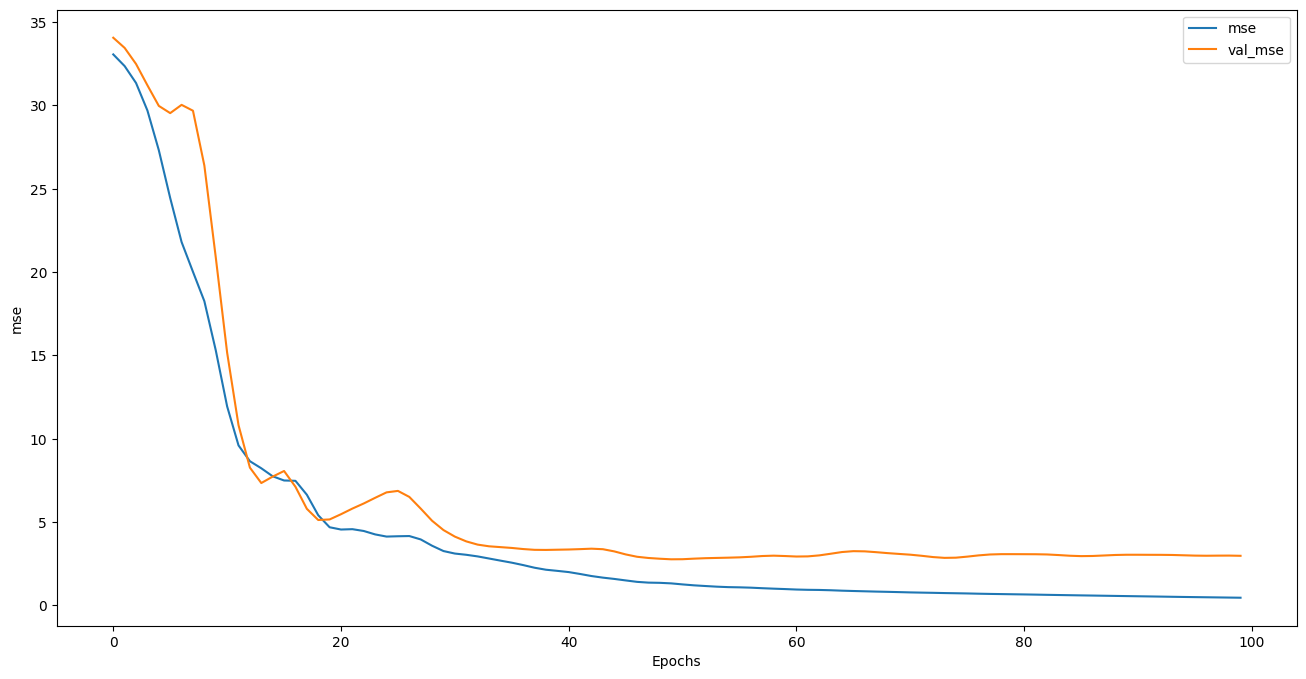

In [263]:
plt.figure(figsize=(16, 8))
plot_graphs(history, 'mse')
plt.show()

In [264]:
model.evaluate(encoded_X,y)

4/4 [==============================] - 0s 3ms/step - loss: 1.5662 - mse: 1.5662


[1.5661532878875732, 1.5661532878875732]

### Zadanie
Wyznacz optymalną wartość latent_dim. Czy istnieje uniwersalny sposób, który możesz wykorzystać? Sprawdź metody doboru wymiaru proponowane przy wykorzystaniu PCA.

# Odszumianie obrazów

In [84]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [92]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [93]:
class CNN_Autoencoder(Model):
  def __init__(self):
    super(CNN_Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(x_train.shape[1], x_train.shape[2], 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = CNN_Autoencoder()

In [94]:
autoencoder.compile(optimizer=Adam(
                  learning_rate=0.001
                  ), loss=losses.MeanSquaredError())

In [95]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.001, 
                                            patience=10, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [96]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                shuffle=True,
                callbacks=[early_stop],
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0119 - val_loss: 0.0024
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - 

In [97]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

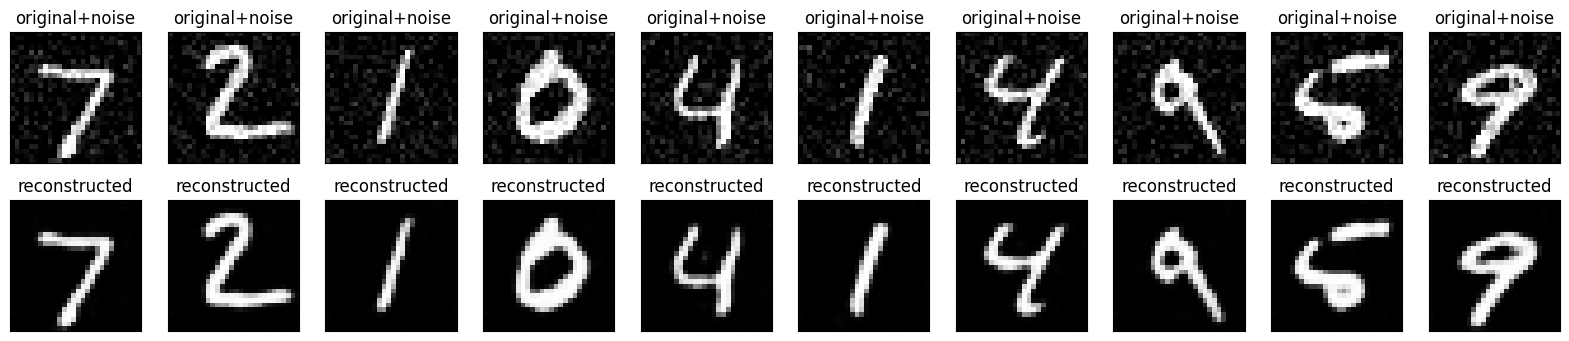

In [98]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i])
  plt.title("original+noise")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Zadanie

Sprawdź, jak autoencoder poradzi sobie z wyższymi wartościami odsetka szumu.

# Detekcja wartości skrajnych

In [5]:
from sklearn.datasets import fetch_kddcup99

In [101]:
from sklearn.datasets import make_classification

In [56]:
X, y = fetch_kddcup99(subset = 'SA', return_X_y = True)

In [57]:
X.shape

(100655, 41)

In [62]:
X = X[:,4:]

In [63]:
X = np.asarray(X).astype('float32')

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

In [64]:
y[0]

b'normal.'

In [72]:
class Autoencoder(Model):
  def __init__(self, n_features, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.InputLayer(input_shape = (n_features,)),
      layers.Dense(64, activation='elu'),
      layers.Dense(latent_dim, activation='elu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='elu'),
      layers.Dense(n_features, activation='elu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [73]:
latent_dim = 10
autoencoder = Autoencoder(X.shape[1],latent_dim)

In [74]:
autoencoder.compile(optimizer=Adam(
                  learning_rate=0.001
                  ), loss=losses.MeanSquaredError())

In [75]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=0.001, 
                                            patience=10, 
                                            verbose=0, 
                                            mode='min', 
                                            restore_best_weights=True)

In [76]:
history = autoencoder.fit(
                    X,
                    X,
                    epochs=500,
                    batch_size=100,
                    callbacks=[early_stop],
                    validation_split=0.2,
                    verbose=1)

Epoch 1/500
806/806 [==============================] - 4s 4ms/step - loss: 0.0040 - val_loss: 0.0115
Epoch 2/500
806/806 [==============================] - 4s 5ms/step - loss: 4.7336e-04 - val_loss: 0.0115
Epoch 3/500
806/806 [==============================] - 3s 4ms/step - loss: 4.1254e-04 - val_loss: 0.0113
Epoch 4/500
806/806 [==============================] - 3s 4ms/step - loss: 4.0171e-04 - val_loss: 0.0113
Epoch 5/500
806/806 [==============================] - 3s 4ms/step - loss: 3.9384e-04 - val_loss: 0.0115
Epoch 6/500
806/806 [==============================] - 4s 5ms/step - loss: 3.8095e-04 - val_loss: 0.0105
Epoch 7/500
806/806 [==============================] - 4s 5ms/step - loss: 3.2260e-04 - val_loss: 0.0093
Epoch 8/500
806/806 [==============================] - 3s 4ms/step - loss: 2.8598e-04 - val_loss: 0.0086
Epoch 9/500
806/806 [==============================] - 4s 4ms/step - loss: 2.5779e-04 - val_loss: 0.0077
Epoch 10/500
806/806 [==============================] - 4s 

3146/3146 [==============================] - 10s 3ms/step


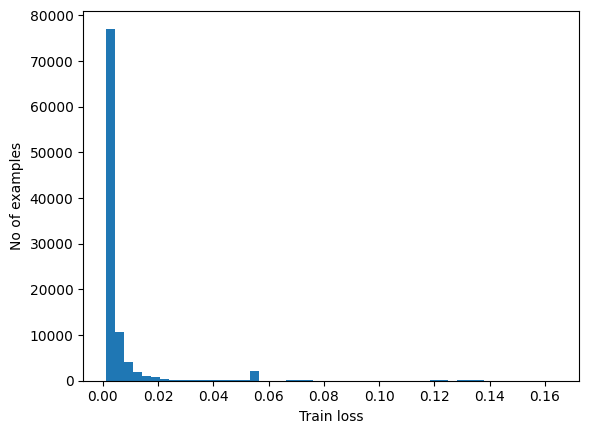

In [77]:
reconstructions = autoencoder.predict(X)
train_loss = tf.keras.losses.mae(reconstructions, X)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

In [78]:
threshold = 0.04

In [79]:
anomalies = (train_loss>threshold).numpy()*1

In [80]:
np.unique(y)

array([b'back.', b'ipsweep.', b'neptune.', b'nmap.', b'normal.', b'pod.',
       b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'teardrop.',
       b'warezclient.'], dtype=object)

In [81]:
y_bin = (y != b"normal.").astype(int)

In [82]:
y_bin.sum()

3377

In [83]:
print(confusion_matrix(anomalies, y_bin))

[[96921    39]
 [  357  3338]]


In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

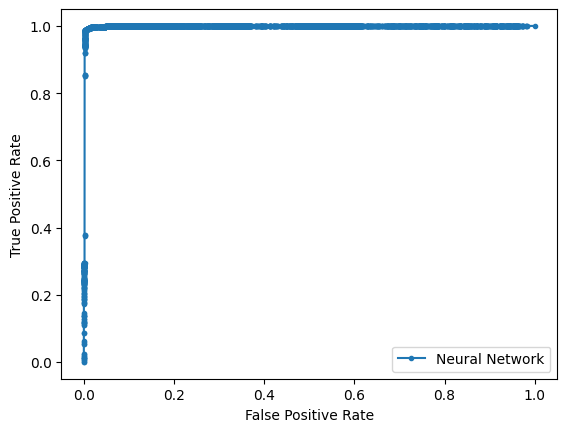

In [86]:
lr_fpr, lr_tpr, _ = roc_curve(y_bin, train_loss)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [45]:

from sklearn.ensemble import IsolationForest

In [47]:

clf = IsolationForest(random_state=42, contamination="auto")
y_pred = clf.fit(X).decision_function(X)

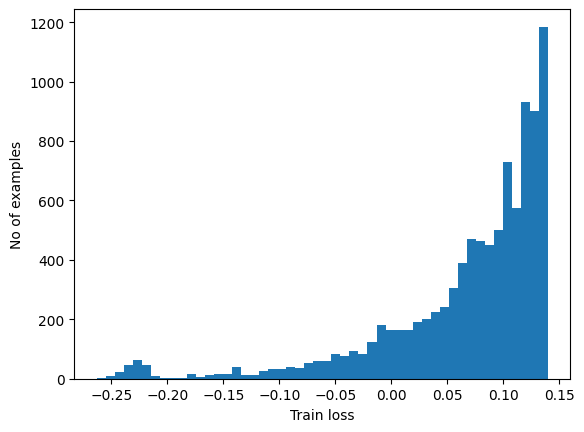

In [50]:
plt.hist(y_pred, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [51]:
print(confusion_matrix(y_pred<-0.1, y_bin))

[[9163    1]
 [ 405    2]]


### Zadanie
Wykryj wartości skrajne w zbiorze Forest Cover

In [ ]:
from sklearn.datasets import fetch_cov

# Podsumowanie

Autoenkodery często są strukturami stosowanymi do przeprowadzania wstępnego treningu pierwszych warstw głębokich modeli uczenia maszynowego.
Technika ta stosowana jest zwłaszcza wtedy, gdy posiadamy bardzo dużo danych, ale tylko niewielka część z nich ma etykiety.
Nienadzorowany trening wstępny może wtedy polegać na:
• nienadzorowanym wytrenowaniu autoenkodera na zbiorze danych bez etykiet,
• a następnie na posłużeniu się koderem jako podstawą modelu trenowanego już na podstawie danych posiadających etykiety.

Jest to przykład tzw. generatywnego treningu wstępnego (ang. generative pre- training), który często jest podstawą działania także bardziej złożonych modeli.
Podstawa działania sieci z rodziny GPT to właśnie generative pre-training, skąd wywodzi się ich nazwa. Służą one do generowania szerokiej gamy tekstów w języku naturalnym oraz w językach programowania.
Podejście to zmniejsza wysiłek związany z pozyskaniem etykiet dla danych lub w niektórych przypadkach całkowicie znosi potrzebę ich posiadania (jak w rodzinie sieci GPT).